## K-Means Clustering(Unsupervised ML)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


#### Loading Iris dataset and prepare a dataframe

In [2]:
iris=datasets.load_iris()
irisdf=pd.DataFrame(iris.data,columns=iris.feature_names)
irisdf.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x = irisdf.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcs.append(kmeans.inertia_)


#### Plotting the line graph to observe elbow

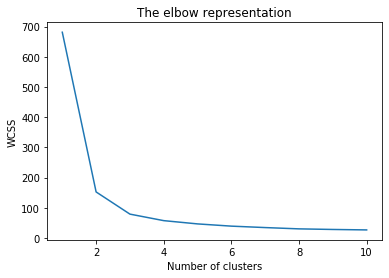

In [4]:
plt.plot(range(1, 11), wcs)
plt.title('The elbow representation')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Representation of different clusters

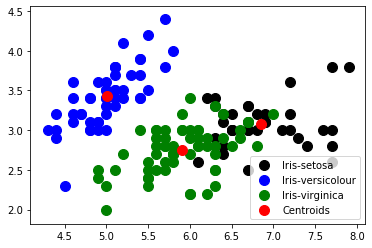

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
